## 下载数据集操作

In [5]:
import torchvision

# 手写数字数据集。下载到data文件夹下
train_set = torchvision.datasets.MNIST(root='./data', train=True, download=True)
test_set = torchvision.datasets.MNIST(root='./data', train=False, download=True)

In [9]:
# CIFAR-10数据集
train_set = torchvision.datasets.CIFAR10(root='./data', train=True, download=True)
test_set = torchvision.datasets.CIFAR10(root='./data', train=False, download=True)

## 逻辑斯谛回归示例：

In [14]:
import torch

# 1、准备数据集（二分类）
x_data = torch.tensor([[1.0], [1.5], [2.0], [3.0]])
y_data = torch.tensor([[0.0], [0.0], [0.0], [1.0]])


# 2、用类设计模型
class LogisticRegressionModel(torch.nn.Module):
    def __init__(self):
        super(LogisticRegressionModel, self).__init__()
        self.linear = torch.nn.Linear(1, 1)  # 输入维度为1，即特征数。输出维度为1
        # nn.Linear类包含两个成员张量：weight和bias

    def forward(self, x):  # 重写父类forward函数，不能少，每次传参时会自动调用该函数
        y_pre = torch.sigmoid(self.linear(x))  # 传入x计算预测值y_pre
        return y_pre


model = LogisticRegressionModel()  # 实例化模型

# 3、构造损失和优化器
criterion = torch.nn.BCELoss(reduction='sum')  # 以二分类交叉熵作为损失衡量
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

# 4、训练
for epoch in range(10000):
    y_pred = model(x_data)
    loss = criterion(y_pred, y_data)
    # print(epoch, loss.item())

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

print('w=', model.linear.weight.item())
print('b=', model.linear.bias.item())

x_test = torch.tensor([[4.0]])
y_test = model(x_test)
print('y_pred:', y_test.data.item())

w= 4.402466297149658
b= -10.868648529052734
y_pred: 0.9988201260566711


如果进行10000轮更新，得出的参数如上。用此模型预测：当学习时间为4h时，考试通过的概率为0.9988。

我们根据该模型，画出学习时间与考试通过概率之间的关系图像：

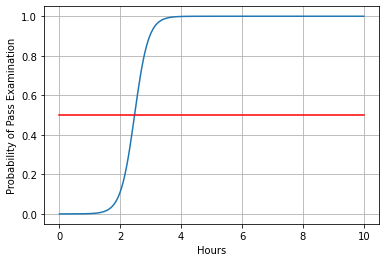

In [32]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0, 10, 200)
# 下面这行记得加 dtype=torch.float32，否则报错
x_t = torch.tensor(x, dtype=torch.float32).view((200, 1))  # view用法跟reshape类似，转成(200,1)
y_t = model(x_t)  # 根据训练出的模型得出不同学习时间下的考试通过概率
y = y_t.data.numpy()  # 为了绘图，转成numpy类型
plt.plot(x, y)
plt.plot([0, 10], [0.5, 0.5], c='r')
plt.xlabel('Hours')
plt.ylabel('Probability of Pass Examination')
plt.grid()
plt.show()